# Titanic Survival Prediction Model
This notebook develops a machine learning model to predict Titanic passenger survival.
It includes data preprocessing, model training, and evaluation.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
data = pd.read_csv('tested 2.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
# Data preprocessing
# Handle missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)
data['Cabin'] = data['Cabin'].fillna('Unknown')

# Feature engineering: Extract deck from Cabin
data['Deck'] = data['Cabin'].apply(lambda x: x[0] if x != 'Unknown' else 'U')

# Drop columns not useful for prediction
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Encode categorical variables
label_encoders = {}
categorical_cols = ['Sex', 'Embarked', 'Deck']
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Normalize numerical features
scaler = StandardScaler()
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

data.head()

/var/folders/r2/nkyss_md62n6fw2wt3d5966m0000gn/T/ipykernel_23034/1237047911.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
/var/folders/r2/nkyss_md62n6fw2wt3d5966m0000gn/T/ipykernel_23034/1237047911.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,1,0.386231,-0.499470,-0.400248,-0.497413,1,7
1,1,3,0,1.371370,0.616992,-0.400248,-0.512278,2,7
2,0,2,1,2.553537,-0.499470,-0.400248,-0.464100,1,7
3,0,3,1,-0.204852,-0.499470,-0.400248,-0.482475,2,7
4,1,3,0,-0.598908,0.616992,0.619896,-0.417492,2,7


In [4]:
# Split data into features and target
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
# Predict on test set
y_pred = model.predict(X_test)

In [7]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



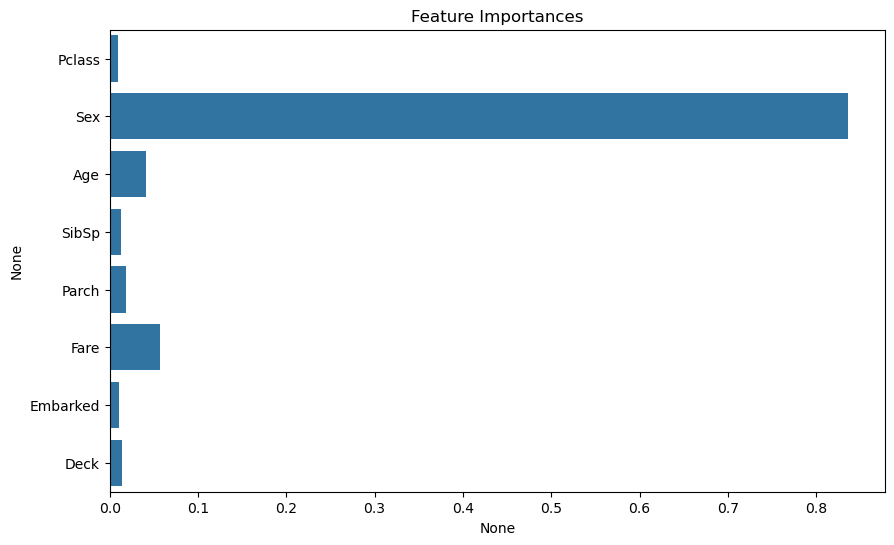

In [8]:
# Feature importance visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances, y=feat_importances.index)
plt.title('Feature Importances')
plt.show()